# Phys555 Assignment 2 Question 2
Karlee Zammit - V00823093

## Linear Regression and KNN

Q2 - Use  the Q1 regression data set for the following:
A) Use the linear regression model in the module 'Class04-Jan19.' Change the hyperparameters to get the best predictions. Explain the details and discuss the accuracy/performance of the model (i.e., associated plots and metrics). 
B) Do the same with KNN regression. What is the best K for your data? Which model (A or B) is more accurate (higher performance)?

In [49]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
%matplotlib inline
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from pandas.plotting import scatter_matrix    
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import sys
from scipy.interpolate import interp1d
from matplotlib import pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
print('Done!')

Done!


In [158]:
bottle_data = pd.read_csv('calcofi_mined.csv')
#print(bottle_data)
#print(bottle_data.columns)

X = bottle_data.loc[:, bottle_data.columns.drop(['salinity'])]
print(X.columns)

Y = bottle_data[['salinity']].copy()
#print(Y.columns)

X_tr,X_va,Y_tr, Y_va = train_test_split(X,Y.values.ravel(),test_size=0.25)

print ('training set == ',np.shape(X_tr),np.shape(Y_tr),',, validation set == ', np.shape(X_va),np.shape(Y_va))

Index(['depth', 'temp', 'oxygen', 'oxygensat', 'silicate', 'nitrate', 'chloro',
       'pressure', 'phosphate', 'phaeo', 'potden', 'volanol', 'dynamicheight',
       'ammonium'],
      dtype='object')
training set ==  (34232, 14) (34232,) ,, validation set ==  (11411, 14) (11411,)


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


Text(0.5, 1.0, 'Linear Regression')

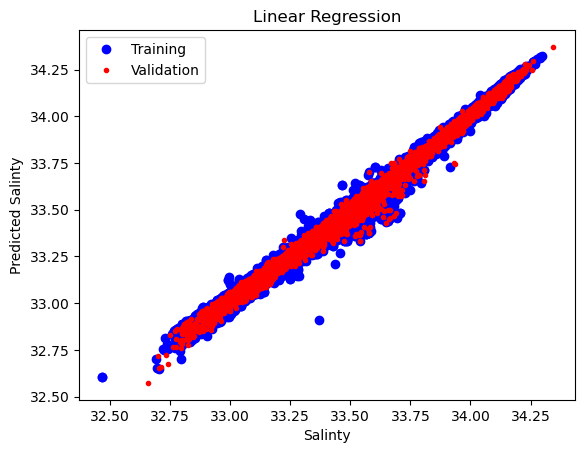

In [159]:
scaler_S= StandardScaler().fit(X_tr)  # line #2
X_tr_Norm= scaler_S.transform(X_tr) # line # 3

X_va_Norm= scaler_S.transform(X_va)  # Line #4

# you can have a step size that gets smaller and smaller 
reg= linear_model.SGDRegressor(loss='squared_error', penalty='L2', alpha=0.001,
                               max_iter=30, eta0=.001, tol=0.0001, learning_rate='constant', n_iter_no_change=5)

# reg= linear_model.SGDRegressor(loss='squared_loss', penalty='L2', alpha=0.01, l1_ratio=0.15, 
#                                         fit_intercept=True, max_iter=100, tol=0.000001, shuffle=True, verbose=0, 
#                                         epsilon=0.1, random_state=None, learning_rate='constant', eta0=.001, 
#                                         power_t=0.25, early_stopping=False, validation_fraction=0.1, 
#                                         n_iter_no_change=5, warm_start=False, average=False)


reg.fit(X_tr_Norm,Y_tr)  # fit the model with training set

#'predictions for training and validation sets'
Y_tr_pred= reg.predict(X_tr_Norm)  
Y_va_pred= reg.predict(X_va_Norm)

plt.figure(3)
plt.plot(Y_tr,Y_tr_pred,'ob')
plt.plot(Y_va,Y_va_pred,'.r')

#plt.plot(np.arange(32.5,34.5,.1),  np.arange(32.5,34.5,.1),'-k')
#plt.plot(np.arange(0,34.5,.1),  np.arange(32.5,34.5,.1),'-k')
plt.xlabel('Salinty')
plt.ylabel('Predicted Salinty')
plt.legend(['Training', 'Validation'], loc='best')
# plt.xlim([0,2])
# plt.ylim([0,2])

print(type(Y_tr))
print(type(Y_tr_pred))

#Statistical information regarding training and validation predictions
mu = np.mean(Y_tr-Y_tr_pred)
median = np.median(Y_tr-Y_tr_pred)
sigma = np.std(Y_tr-Y_tr_pred)

muv = np.mean(Y_va-Y_va_pred)
medianv = np.median(Y_va-Y_va_pred)
sigmav = np.std(Y_va-Y_va_pred)


textstr = '$\mu=%.4f$\n$\mathrm{med}=%.4f$\n$\sigma=%.4f$'%(mu, median, sigma)
textstrv = '$\mu=%.4f$\n$\mathrm{med}=%.4f$\n$\sigma=%.4f$'%(muv, medianv, sigmav)

#plt.text(34.51,34,textstr, color='b',fontsize=15)
#plt.text(34.51,33,textstrv, color='r',fontsize=15)
plt.title('Linear Regression')

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}


C:\Users\Karlee\miniconda3\envs\phys555\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Text(0.5, 1.0, 'KNN Regression')

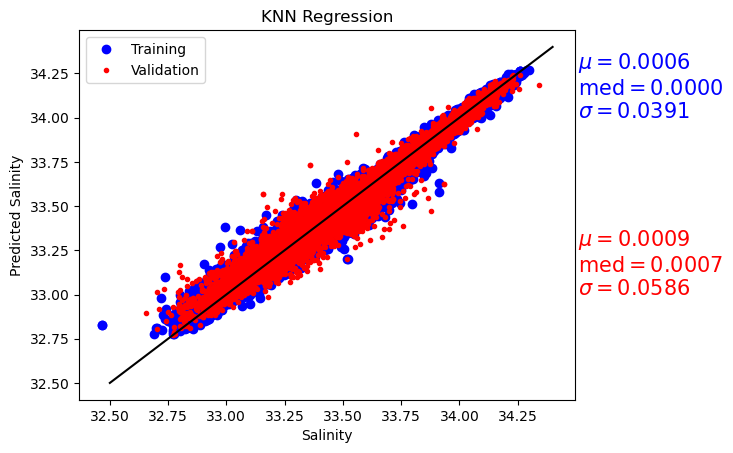

In [162]:
from sklearn.neighbors import KNeighborsRegressor  # choose your model

reg = KNeighborsRegressor(n_neighbors=3)  # set the hyperparameters
print (reg.get_params())
reg.fit(X_tr_Norm,Y_tr)  # train it

Y_pre = reg.predict(X)

#'predictions for training and validation sets'
Y_tr_pred= reg.predict(X_tr_Norm)  
Y_va_pred= reg.predict(X_va_Norm)

plt.figure(3)
plt.plot(Y_tr,Y_tr_pred,'ob')
plt.plot(Y_va,Y_va_pred,'.r')

plt.plot(np.arange(32.5,34.5,.1),  np.arange(32.5,34.5,.1),'-k')
plt.xlabel('Salinity')
plt.ylabel('Predicted Salinity')
plt.legend(['Training', 'Validation'])
# plt.xlim([0,2])
# plt.ylim([0,2])

#Statistical information regarding training and validation predictions
mu = np.mean(Y_tr-Y_tr_pred)
median = np.median(Y_tr-Y_tr_pred)
sigma = np.std(Y_tr-Y_tr_pred)

muv = np.mean(Y_va-Y_va_pred)
medianv = np.median(Y_va-Y_va_pred)
sigmav = np.std(Y_va-Y_va_pred)

textstr = '$\mu=%.4f$\n$\mathrm{med}=%.4f$\n$\sigma=%.4f$'%(mu, median, sigma)
textstrv = '$\mu=%.4f$\n$\mathrm{med}=%.4f$\n$\sigma=%.4f$'%(muv, medianv, sigmav)


plt.text(34.51,34,textstr, color='b',fontsize=15)
plt.text(34.51,33,textstrv, color='r',fontsize=15)
plt.title('KNN Regression')

## References

